In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
from glob import glob
import base64
from matplotlib import pyplot as plt
import cv2

import torch

from dataset.dataset_unet import mask2data
from utils.mask_functions import rle2mask

mask_data = mask2data()

%matplotlib inline

ImageId  \
0      1.2.276.0.7230010.3.1.4.8323329.6904.151787520...   
1      1.2.276.0.7230010.3.1.4.8323329.13666.15178752...   
2      1.2.276.0.7230010.3.1.4.8323329.11028.15178752...   
3      1.2.276.0.7230010.3.1.4.8323329.10366.15178752...   
4      1.2.276.0.7230010.3.1.4.8323329.10016.15178752...   
...                                                  ...   
12949  1.2.276.0.7230010.3.1.4.8323329.4070.151787518...   
12950  1.2.276.0.7230010.3.1.4.8323329.11296.15178752...   
12951  1.2.276.0.7230010.3.1.4.8323329.31695.15178751...   
12952  1.2.276.0.7230010.3.1.4.8323329.1853.151787516...   
12953  1.2.276.0.7230010.3.1.4.8323329.5585.151787518...   

                                           EncodedPixels  
0                                                     -1  
1      557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...  
2                                                     -1  
3      514175 10 1008 29 994 30 993 32 991 33 990 34 ...  
4      592184 33 976 58 956 73 94

## 0. Util 函数-mask与RLE格式互转

In [2]:
mask_data[6]

{'img_id': '1.2.276.0.7230010.3.1.4.8323329.10005.1517875220.958951',
 'masks': ['209126 1 1019 6 1015 10 1012 13 1010 14 1008 16 1007 16 1006 18 1004 20 1003 20 1002 22 1001 22 1001 23 999 24 999 24 999 25 997 26 997 27 996 27 996 27 996 28 995 28 995 28 995 29 994 29 994 30 993 30 993 30 993 31 992 31 992 31 992 32 991 32 992 32 991 33 990 33 990 33 991 33 990 33 990 33 990 34 990 33 990 34 989 35 988 35 989 35 988 35 989 35 988 35 989 34 989 35 989 34 989 34 989 35 989 34 989 35 988 36 988 35 988 35 989 35 989 34 989 34 990 34 989 34 990 34 989 34 990 34 989 34 990 34 990 34 989 34 990 33 990 34 990 33 991 32 991 33 991 32 992 32 991 33 991 32 992 32 991 32 992 32 992 31 992 32 992 31 993 31 993 31 992 31 993 31 993 30 993 31 993 30 994 30 993 30 994 30 994 30 994 29 994 30 994 30 994 30 994 29 995 29 995 29 994 29 995 29 995 29 995 28 996 28 995 29 995 29 995 29 994 30 994 30 993 31 993 31 992 31 993 31 993 31 992 32 992 32 992 32 992 32 991 33 991 33 991 33 991 32 992 32 992 33 99

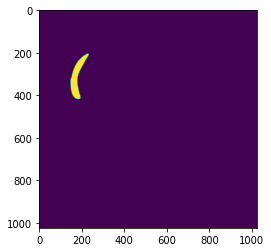

In [3]:
plt.imshow(rle2mask(mask_data[6]['masks'][0], 1024, 1024))

## 1. 数据集函数

In [4]:
from torch.utils.data import DataLoader, Dataset

In [5]:
class MyDataset(Dataset):
    def __init__(self, img_id_list, IMG_SIZE, mode='train', augmentation=False):
        """传参，定义参数
        1. 数据集列表，
            - 本地数据，文件名/图片名
            - API，图片ID
        2. 图片读取尺寸
        3. 训练模式or推理模式
        4. 是否做Data augmentation
        ...
        """
        pass
    
    def __getitem__(self, idx):
        """读取下一个样本
        1. 读取本地图片，或读API接口获取base64格式图片
        2. 预处理, 如变换图片尺寸
        3. 若训练集，读取Mask图片
        4. Data augmentation
        """
        pass

    def __len__(self):
        """定义样本个数
        """
        pass

In [6]:
def prepare_trainset():
    """
    1. 切分数据集，训练集/验证集
    2. 定义MyDataset训练集、MyDataset验证集
    3. 定义Pytorch的DataLoader
    
    train_dl = DataLoader(
            train_dataset,
            batch_size=16,
            shuffle=True,
            #sampler=sampler,
            num_workers=8,
            drop_last=True
        )
    val_dl = DataLoader(
            val_dataset,
            batch_size=16,
            shuffle=False,
            #sampler=sampler,
            num_workers=8,
            drop_last=True
        )
    """
    pass

In [7]:
from dataset.dataset_unet import prepare_trainset

train_dl, val_dl = prepare_trainset(BATCH_SIZE=16, NUM_WORKERS=8, SEED=2019, IMG_SIZE=256, debug=True)

device = 'cpu'#'cuda:0'
for i, (images, masks) in enumerate(train_dl):#一次读取一个Bath
    images = images.to(device=device, dtype=torch.float)
    masks = masks.to(device=device, dtype=torch.float)
    if i==0:
        break

images.size(), masks.size()

Count of trainset (for training):  900
Count of validset (for training):  200


(torch.Size([16, 1, 256, 256]), torch.Size([16, 1, 256, 256]))

## 2. Utils函数
    - 训练日志
    - 训练checkpoint
    - GPU交互

In [8]:
## 参考utils/utils.py, utils/gpu_utils.py

## 3. 分割的评估函数
    - [Dice](https://zh.wikipedia.org/wiki/Dice%E7%B3%BB%E6%95%B0)
    - [IOU](https://zh.wikipedia.org/wiki/%E9%9B%85%E5%8D%A1%E5%B0%94%E6%8C%87%E6%95%B0)

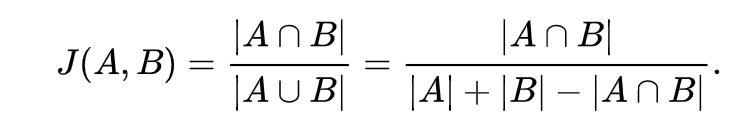

In [9]:
from PIL import Image
Image.open('media/IOU.png')

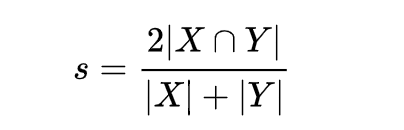

In [10]:
Image.open('media/DICE.png')

In [11]:
def dice(gt, pred):
    
    threshold = 0.5
    pred = (pred>threshold).astype(np.float)
    
    intersect = (pred * gt).sum()
    union = (pred + gt).sum()
    
    return ((2.0*intersect) / union)

def iou(gt, pred):
    
    threshold = 0.5
    pred = (pred>threshold).astype(np.float)
    
    intersect = (pred * gt).sum()
    union = (pred + gt).sum()
    
    return (intersect / (union - intersect))

metric = dice
metric1 = iou

1.0
1.0


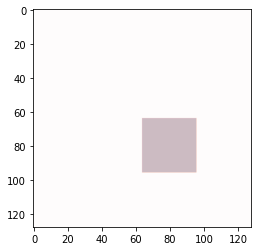

In [12]:
backgroud = np.zeros((128, 128))

gt = np.zeros((128, 128))
gt[64:96, 64:96] = 1.0

pred0 = np.zeros((128, 128))
pred0[64:96, 64:96] = 1.0
print(metric(gt, pred0))
print(metric1(gt, pred0))

plt.imshow(backgroud, cmap=plt.cm.binary)
plt.imshow(gt, cmap=plt.cm.Blues, alpha=0.1)
plt.imshow(pred0, cmap=plt.cm.Reds, alpha=0.2)

0.0
0.0


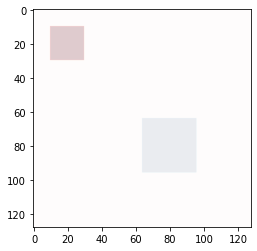

In [13]:
pred1 = np.zeros((128, 128))
pred1[10:30, 10:30] = 1.0
print(metric(gt, pred1))
print(metric1(gt, pred1))

plt.imshow(backgroud, cmap=plt.cm.binary)
plt.imshow(gt, cmap=plt.cm.Blues, alpha=0.1)
plt.imshow(pred1, cmap=plt.cm.Reds, alpha=0.2)

0.6011560693641619
0.4297520661157025


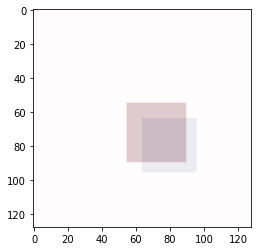

In [14]:
pred2 = np.zeros((128, 128))
pred2[55:90, 55:90] = 1.0
print(metric(gt, pred2))
print(metric1(gt, pred2))

plt.imshow(backgroud, cmap=plt.cm.binary)
plt.imshow(gt, cmap=plt.cm.Blues, alpha=0.1)
plt.imshow(pred2, cmap=plt.cm.Reds, alpha=0.2)

nan


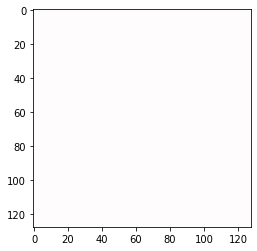

In [15]:
## 思考：GT是空的，预测也是空的，Metric应该等于1，即完全预测正确，如何改正metric函数？
gt = np.zeros((128, 128))
pred = np.zeros((128, 128))

print(metric(gt, pred))

plt.imshow(backgroud, cmap=plt.cm.binary)
plt.imshow(gt, cmap=plt.cm.Blues, alpha=0.1)
plt.imshow(pred, cmap=plt.cm.Reds, alpha=0.2)

## 4. 训练脚本
    - train_unet.py

In [16]:
def run_training():
    """training pipline
    
    1. 读取network
        - 加载预训练模型
        - 定义训练全部层的参数/哪几层参数
        - 定义学习率/为每一层定义学习率
        - 定义优化函数optimizer、学习率变化方案scheduler
        - 
    2. 训练N_EPOCH次迭代，每一个迭代内：
        - 用DataLoader循环读取训练集上每一个batch数据（N个图片、N个mask）
        - 将N个图片传入network，输出模型最后一层的预测（sigmoid概率）
        - 计算这个batch上的loss、metric，并存下来
        - 反向传播，更新参数（.backward()）（是否梯度累加）
        - 计算所有batch上loss、metric的总体均值，代表这个EPOCH
        - 用DataLoader循环读取验证集上每一个batch数据，与以上操作相似，计算验证集上的loss、metric，用于决定哪一个EPOCH停止训练
        - 更新logging、保存checkpoint
    """
    pass

## 5. Unet介绍

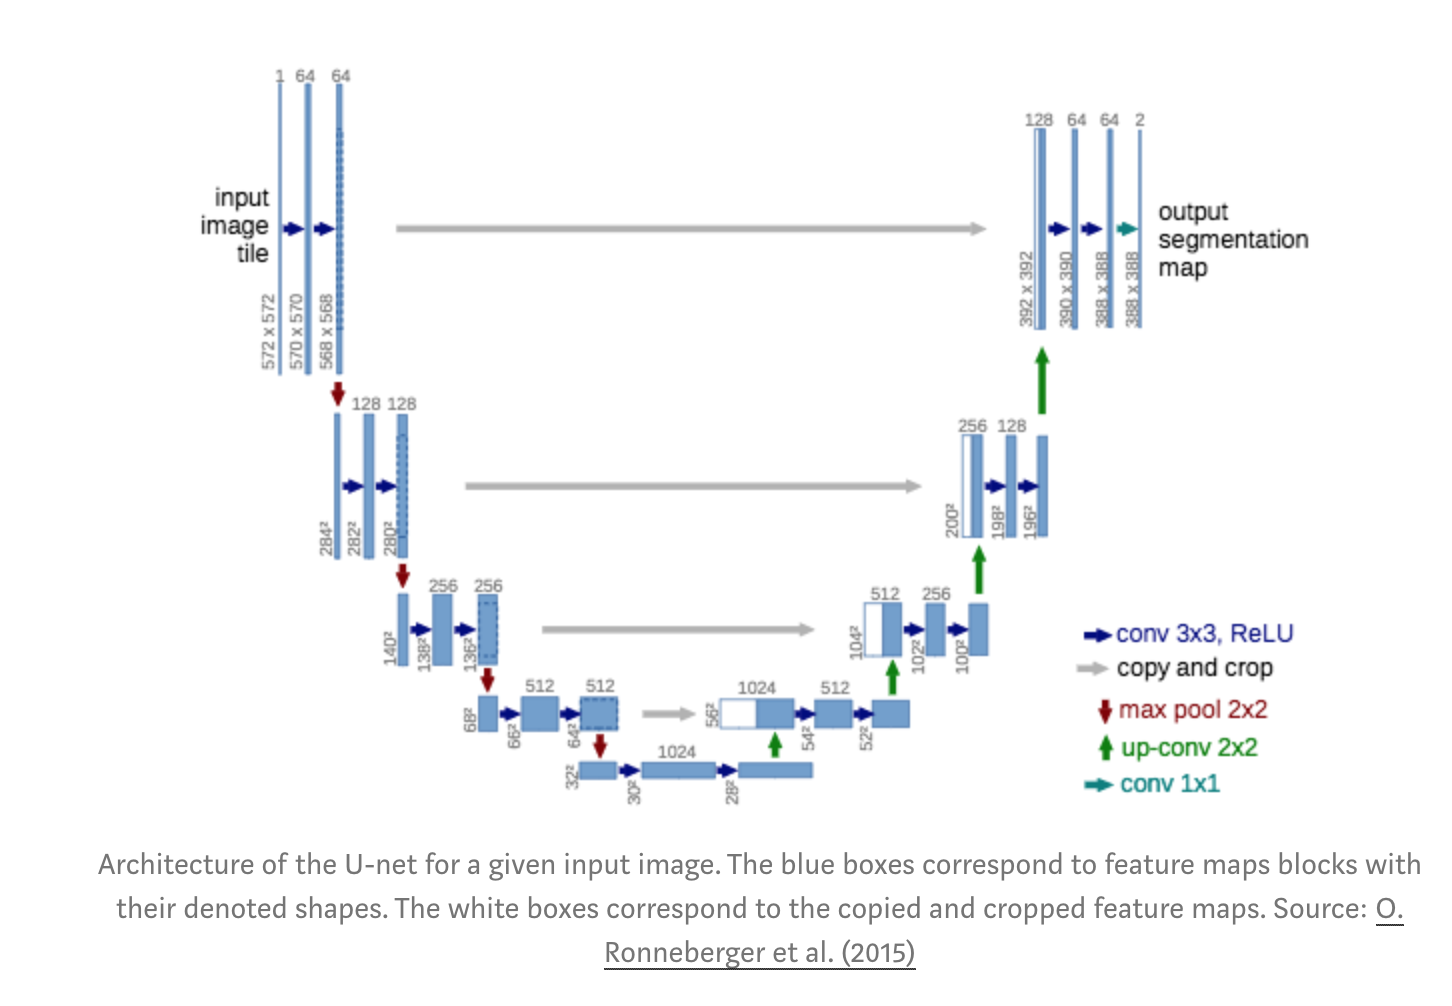

In [17]:
Image.open('media/unet.png')

In [18]:
import sys
sys.path.append('../')

import torch

#from model.model_unet import UNetResNet34
from model.model_unet_vanilla import UNetResNet34

In [19]:
net = UNetResNet34(debug=True)
device = 'cuda:0'#'cpu'
net = net.to(device=device)

In [20]:
for k,v in net.named_parameters():
    print(k, '='*20, v.size())

resnet.conv1.weight ==================== torch.Size([64, 3, 7, 7])
resnet.bn1.weight ==================== torch.Size([64])
resnet.bn1.bias ==================== torch.Size([64])
resnet.layer1.0.conv1.weight ==================== torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn1.weight ==================== torch.Size([64])
resnet.layer1.0.bn1.bias ==================== torch.Size([64])
resnet.layer1.0.conv2.weight ==================== torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn2.weight ==================== torch.Size([64])
resnet.layer1.0.bn2.bias ==================== torch.Size([64])
resnet.layer1.1.conv1.weight ==================== torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn1.weight ==================== torch.Size([64])
resnet.layer1.1.bn1.bias ==================== torch.Size([64])
resnet.layer1.1.conv2.weight ==================== torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn2.weight ==================== torch.Size([64])
resnet.layer1.1.bn2.bias ==================== torch.Size([64])
res

In [21]:
from dataset.dataset_unet import prepare_trainset

train_dl, val_dl = prepare_trainset(BATCH_SIZE=4, NUM_WORKERS=8, SEED=2019, IMG_SIZE=256, debug=True)

device = 'cuda:0'
for i, (images, masks) in enumerate(train_dl):#一次读取一个Bath
    images = images.to(device=device, dtype=torch.float)
    masks = masks.to(device=device, dtype=torch.float)
    if i==0:
        break

images.size(), masks.size()

Count of trainset (for training):  900
Count of validset (for training):  200


(torch.Size([4, 1, 256, 256]), torch.Size([4, 1, 256, 256]))

In [22]:
logit = net(images)

input:  torch.Size([4, 3, 256, 256])
e1 torch.Size([4, 64, 128, 128])
e2 torch.Size([4, 64, 128, 128])
e3 torch.Size([4, 128, 64, 64])
e4 torch.Size([4, 256, 32, 32])
e5 torch.Size([4, 512, 16, 16])
center torch.Size([4, 256, 8, 8])
d5 torch.Size([4, 32, 16, 16])
d4 torch.Size([4, 32, 32, 32])
d3 torch.Size([4, 32, 64, 64])
d2 torch.Size([4, 32, 128, 128])
d1 torch.Size([4, 32, 256, 256])
logit torch.Size([4, 1, 256, 256])


In [23]:
_loss = net.criterion(logit, masks)
_loss

tensor(0.5791, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [24]:
_metric = net.metric(logit, masks)
_metric

tensor(0.0042, device='cuda:0')